<a href="https://colab.research.google.com/github/edusgr/EDP-1/blob/main/SERIE%20DE%20FOURIER%20GENERALIZADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables y la función
x, lam = sp.symbols('x lambda', real=True)
f = sp.Function('f')(x)


In [29]:
# Definimos la EDO
edo = sp.Eq(f.diff(x, 2) + 2*f.diff(x) + lam*f, 0)


$f''(x)+2f'(x)+λf(x)=0; \hspace{1.0cm} $
$0<x<1$

y las condiciones

$f(0)=0, \hspace{0.6 cm}$
$f(1)=0$

In [30]:
# Resolver la EDO
sol = sp.dsolve(edo, f)
C1, C2 = sp.symbols('C1 C2')
general_solution = sol.rhs

# Definir raíces de la ecuación característica
r = sp.symbols('r')
char_eq = sp.Eq(r**2 + 2*r + lam, 0)
roots = sp.solve(char_eq, r)

se escribe como problema de sturm-lioville


$[p(x)f'(x)]+[q(x)+λr(x)]f(x)=0$


Así

$f''+2f'+λf=0$

$[e^{2x}f']'+λe^{2x}f=0$

con

$p(x)=e^{2x}, \hspace{1.0 cm} q(x)=0, \hspace{1.0 cm} r(x)=e^{2x}$

Ahora se resuelve con la ecuacion caracteristica obteniendo las soluciones
$r=-1+\sqrt{1-λ},\hspace{1.0 cm}r=-1-\sqrt{1-λ}$

In [31]:
# Suponemos λ > 1 (raíces complejas) → λ = 1 + μ², μ > 0
mu = sp.symbols('mu', positive=True, real=True)
lam_sub = 1 + mu**2

# Sustituyendo en la solución general
f_sol = sp.exp(-x) * (C1 * sp.cos(mu * x) + C2 * sp.sin(mu * x))

# Condiciones de frontera
eq1 = sp.Eq(f_sol.subs(x,0), 0)
eq2 = sp.Eq(f_sol.subs(x,1), 0)


Se consideran los casos posibles del problema

$λ<1$ raices reales diferentes

$λ=1$ raices reales dobles

$λ>1$ raices imaginarias

In [32]:
# Aplicar f(0)=0 → C1 = 0
C1_sol = 0
f_sol = sp.exp(-x) * (C2 * sp.sin(mu * x))

# Condición f(1)=0 → sin(mu) = 0 → mu = n*pi
n = sp.symbols('n', integer=True, positive=True)
mu_n = n * sp.pi
lam_n = 1 + (n * sp.pi)**2

# Autofunción f_n(x)
fn = sp.exp(-x) * sp.sin(n * sp.pi * x)

Se calculan los autovalores que cumplan con las condiciones de frontera
esto es

$λ_n=1+(nπ)^2$

Ahora obtuvimos las autofunciones dadas por

$f_n(x)=e^{-x}sin(nπx)$


In [33]:
# Definir u(x) y peso r(x)
u = sp.exp(-x)
r = sp.exp(2*x)

# Cálculo de coeficientes c_n
numerador = sp.integrate(u * fn * r, (x, 0, 1))
denominador = sp.integrate(fn**2 * r, (x, 0, 1))
cn = sp.simplify(numerador / denominador)


Asi el valor de $C_n$ es:

$C_n=\frac{2-2(-1)^n)}{πn}$

In [34]:
# Convertimos a funciones numéricas
u_lambd = sp.lambdify(x, u, 'numpy')

def f_numerica(n_val, x_vals):

    return np.exp(-x_vals) * np.sin(n_val * np.pi * x_vals)

def c_numerico(n_val):
    expr = cn.subs(n, n_val)
    return float(expr.evalf())

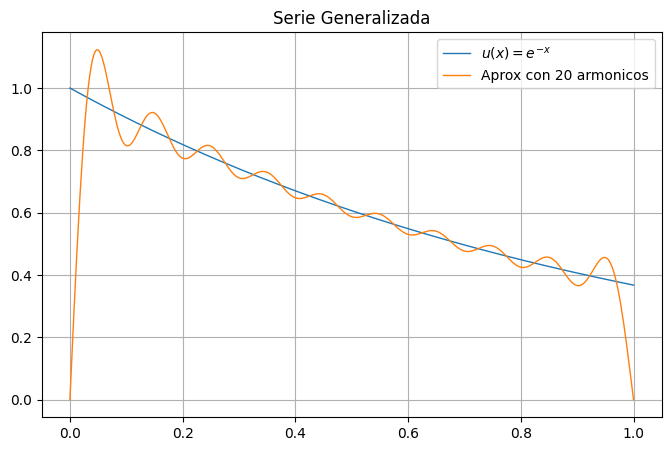

In [35]:

x_vals = np.linspace(0, 1, 400)
u_vals = u_lambd(x_vals)

# Aproximación de la serie (N términos)
N = 20
approx_vals = np.zeros_like(x_vals)

for k in range(1, N+1):
    # Indented these lines to be inside the for loop
    ck = c_numerico(k)
    fk = f_numerica(k, x_vals)
    approx_vals += ck * fk

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x_vals, u_vals, label=r'$u(x) = e^{-x}$', linewidth=1)
plt.plot(x_vals, approx_vals, label=f'Aprox con {N} armonicos', linestyle='-', linewidth=1)
plt.title('Serie Generalizada')
plt.legend()
plt.grid(True)
plt.show()

Construccion de la grafica de la serie generalizada para N numero de armonicos